# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
print(weather_api_key)

65d34e92fbec8c11019863b392cefdc6


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_name = []
cloudiness = []
country = []
date = []
windspeed = []
humidity = []
lat = []
lng = []
max_temp = []
index_counter = 0
set_counter = 1


print("Beginning Data Retrieval")
print("----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# For loop
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        windspeed.append(response["wind"]["speed"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
            
        else:
            index_counter = index_counter + 1
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found.")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
----------------------------
Processing Record 1 of Set 1 : provideniya
Processing Record 2 of Set 1 : petropavlovsk-kamchatskiy
Processing Record 3 of Set 1 : nikolskoye
Processing Record 4 of Set 1 : kibaya
Processing Record 5 of Set 1 : saskylakh
Processing Record 6 of Set 1 : beira
Processing Record 7 of Set 1 : lagoa
Processing Record 8 of Set 1 : lavrentiya
Processing Record 9 of Set 1 : albany
Processing Record 10 of Set 1 : mataura
Processing Record 11 of Set 1 : hvittingfoss
Processing Record 12 of Set 1 : magan
City not found.
Processing Record 13 of Set 1 : touros
Processing Record 14 of Set 1 : vaini
Processing Record 15 of Set 1 : east london
Processing Record 16 of Set 1 : santarem
Processing Record 17 of Set 1 : kiama
City not found.
Processing Record 18 of Set 1 : ipixuna
City not found.
Processing Record 19 of Set 1 : qinhuangdao
Processing Record 20 of Set 1 : vila
Processing Record 21 of Set 1 : havelock
Processing Record 22 of Set 1 : bluff


Processing Record 38 of Set 4 : konza
Processing Record 39 of Set 4 : malayal
Processing Record 40 of Set 4 : saldanha
Processing Record 41 of Set 4 : naze
Processing Record 42 of Set 4 : seymchan
Processing Record 43 of Set 4 : aitape
Processing Record 44 of Set 4 : rehau
Processing Record 45 of Set 4 : saint-philippe
Processing Record 46 of Set 4 : kailua
Processing Record 47 of Set 4 : hluti
Processing Record 48 of Set 4 : ostrovnoy
City not found.
Processing Record 49 of Set 4 : usinsk
Processing Record 50 of Set 4 : maragogi
City not found.
Processing Record 0 of Set 5 : bairiki
Processing Record 1 of Set 5 : sorong
Processing Record 2 of Set 5 : santa isabel do rio negro
City not found.
City not found.
Processing Record 3 of Set 5 : northam
Processing Record 4 of Set 5 : lasa
City not found.
Processing Record 5 of Set 5 : bengkulu
Processing Record 6 of Set 5 : zhezkazgan
Processing Record 7 of Set 5 : krasnoselkup
Processing Record 8 of Set 5 : margate
Processing Record 9 of Set

Processing Record 25 of Set 8 : banes
Processing Record 26 of Set 8 : revelstoke
Processing Record 27 of Set 8 : zeya
Processing Record 28 of Set 8 : banda aceh
Processing Record 29 of Set 8 : mariani
Processing Record 30 of Set 8 : richmond
Processing Record 31 of Set 8 : senador pompeu
Processing Record 32 of Set 8 : narsaq
Processing Record 33 of Set 8 : purpe
City not found.
Processing Record 34 of Set 8 : saint anthony
Processing Record 35 of Set 8 : miraflores
Processing Record 36 of Set 8 : dandong
Processing Record 37 of Set 8 : flin flon
Processing Record 38 of Set 8 : tocopilla
Processing Record 39 of Set 8 : hofn
Processing Record 40 of Set 8 : mount pleasant
City not found.
Processing Record 41 of Set 8 : yarada
Processing Record 42 of Set 8 : waingapu
Processing Record 43 of Set 8 : bukachacha
Processing Record 44 of Set 8 : port-gentil
Processing Record 45 of Set 8 : udachnyy
Processing Record 46 of Set 8 : evensk
Processing Record 47 of Set 8 : hwange
City not found.
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
d = {"City": city_name, "Lat": lat, "Lng": lng, "Max Temp": max_temp, "Humidity": humidity, 
    "Cloudiness": cloudiness, "Wind Speed": windspeed, "Country":country, "Date": date}
df = pd.DataFrame(d)
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Provideniya,64.3833,-173.3000,11.73,85,99,3.27,RU,1628244960
1,Petropavlovsk-Kamchatskiy,53.0452,158.6483,12.33,62,75,3.00,RU,1628244960
2,Nikolskoye,59.7035,30.7861,20.94,66,55,4.96,RU,1628244960
3,Kibaya,-5.3000,36.5667,24.18,37,21,3.15,TZ,1628244961
4,Saskylakh,71.9167,114.0833,15.10,47,100,6.24,RU,1628244961


In [5]:
# Export to CSV 
df.to_csv("weather.csv")



## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [20]:
#  Get the indices of cities that have humidity over 100%.
df["Humidity"].max() 

100

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Analysis: The highest temperature is found at 40 latitude.


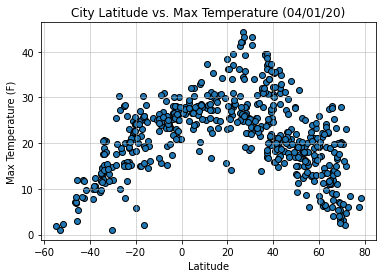

In [6]:
plt.scatter(df["Lat"], df["Max Temp"], edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.grid(linestyle="-", linewidth = 1, alpha = 0.5)
plt.savefig("City Lat vs Max Temp.png")
print(f"Analysis: The highest temperature is found at 40 latitude.")

## Latitude vs. Humidity Plot

Analysis: higher humidity is found between 0 and 20 latitude.


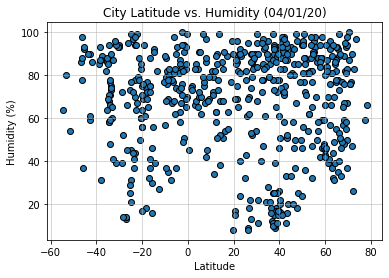

In [7]:
plt.scatter(df["Lat"], df["Humidity"], edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.grid(linestyle="-", linewidth = 1, alpha = 0.5)
plt.savefig("city_lat_vs_humidity.png")
print(f"Analysis: higher humidity is found between 0 and 20 latitude.")

## Latitude vs. Cloudiness Plot

Analysis: cloudiness is widely spread across the latitude.


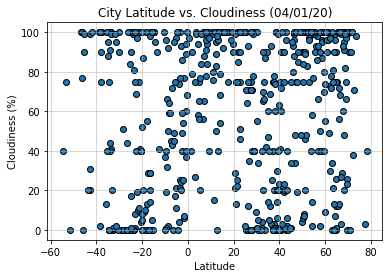

In [8]:
plt.scatter(df["Lat"], df["Cloudiness"], edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.grid(linestyle="-", linewidth= 1, alpha = 0.5)
plt.savefig("city_lat_vs_cloudiness.png")
print(f"Analysis: cloudiness is widely spread across the latitude.")

## Latitude vs. Wind Speed Plot

Analysis: as latitude increases, wind speed seems to decrease.


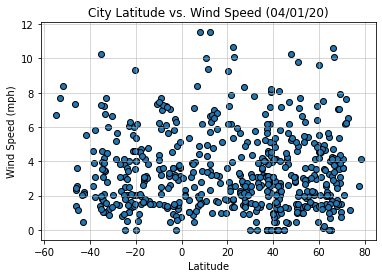

In [9]:
plt.scatter(df["Lat"], df["Wind Speed"], edgecolor = "black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.grid(linestyle="-", linewidth= 1, alpha = 0.5)
plt.savefig("city_lat_vs_WindSpeed.png")
print(f"Analysis: as latitude increases, wind speed seems to decrease.")

## Linear Regression

In [10]:
# Perform Linear Regression
def linear_reg(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    print(f"The r-value is: {rvalue}")
    # Get regress values
    regress_values= x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    return line_eq
def annotate(line_eq, a, b):    
    plt.annotate(line_eq, (a,b), fontsize = 15, color = "red")
    
    
# Create Northern and Southern Hemisphere DataFrames
northern_hem = df.loc[df["Lat"] > 0]
southern_hem = df.loc[df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.6265589779015378


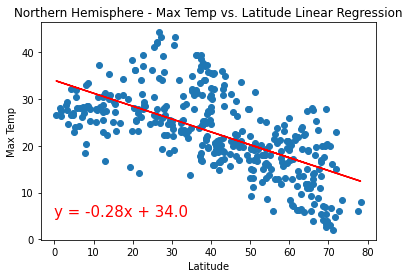

In [11]:
eq = linear_reg(northern_hem["Lat"], northern_hem["Max Temp"])
annotate(eq, 0, 5)
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("north_MaxTemp_lat.png")

# There is a negative correlation between the Northern Hemisphere maximum temperature and latitude.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7468812913682435


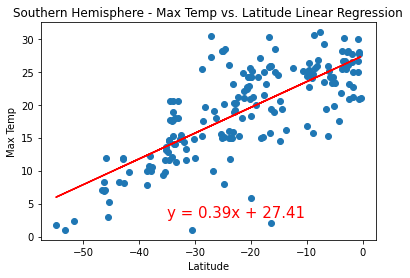

In [12]:
eq = linear_reg(southern_hem["Lat"], southern_hem["Max Temp"])
annotate(eq, -35,3)
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("south_MaxTemp_lat.png")

# Analysis: There is a positive linear relationship between the Southern Hemisphere maximum temperature and the latitude.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.006802397163825403


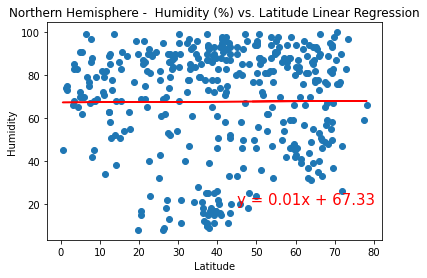

In [13]:
eq = linear_reg(northern_hem["Lat"], northern_hem["Humidity"])
annotate(eq, 45, 20)
plt.title("Northern Hemisphere -  Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("north_humidity_lat.png")

# Analysis: The two variables are not correlated. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.013193004141682042


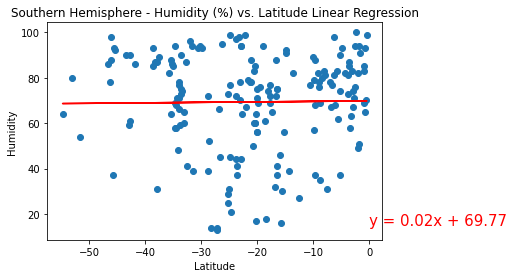

In [14]:
eq = linear_reg(southern_hem["Lat"], southern_hem["Humidity"])
annotate(eq,0, 15)
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("south_humidity_lat.png")

# Analysis: The two variables are not correlated.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.07777553987725626


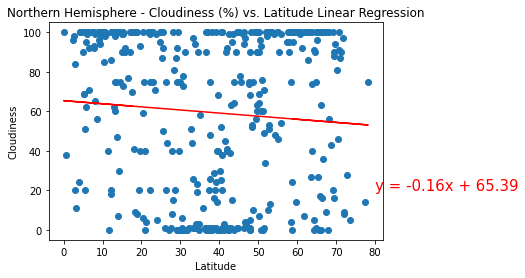

In [179]:
eq = linear_reg(northern_hem["Lat"], northern_hem["Cloudiness"])
annotate(eq,80, 20)
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("north_cloudiness_lat.png")

#Analysis: There is a negative correlation between the two variables. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.013222244202379439


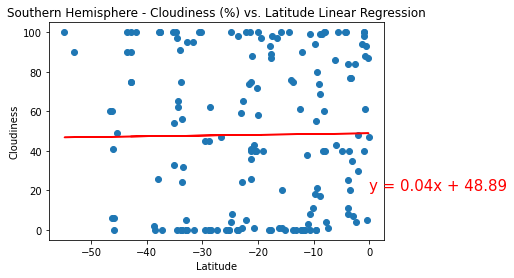

In [187]:
eq = linear_reg(southern_hem["Lat"], southern_hem["Cloudiness"])
annotate(eq,0, 20)
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("south_cloudiness_lat.png")

#Analysis: There is no correlation between the two variables. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.038395566791962675


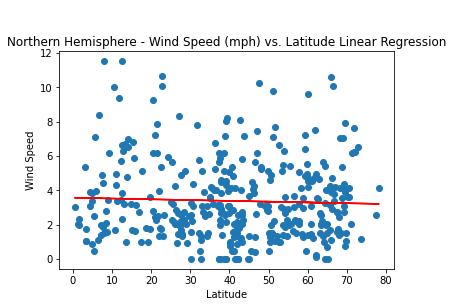

In [15]:
eq = linear_reg(northern_hem["Lat"], northern_hem["Wind Speed"])
annotate(eq,40, 14)
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("north_windspeed_lat.png")

#Analysis: There is no correlation between the two variables.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.044302003446756194


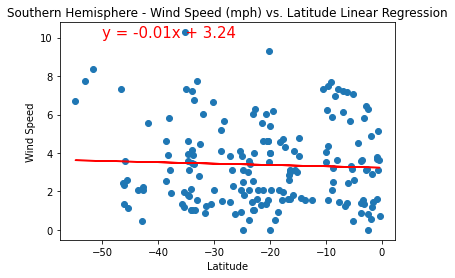

In [16]:
eq = linear_reg(southern_hem["Lat"], southern_hem["Wind Speed"])
annotate(eq,-50, 10)
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("south_windspeed_lat.png")

#Analysis: There is more of a negative correlation between the two variables, than no correlation. 